# Looking at how adding an extra feature with varying levels of relevance effects the r2_score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
X, y, coef = make_regression(n_samples=100, 
                             n_features=10, 
                             n_informative=5, 
                             n_targets=1, 
                             bias=0.0, 
                             effective_rank=None, 
                             tail_strength=0.5, 
                             noise=100, 
                             shuffle=True, 
                             coef=True, 
                             random_state=42)

In [3]:
pd.DataFrame(coef, index=[f"feat_{x}" for x in range(0, coef.shape[0])]).T

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9
0,16.748258,0.0,0.0,63.643025,0.0,70.647573,0.0,10.456784,3.158614,0.0


In [4]:
df = (pd.DataFrame(X, columns=[f"feat_{x}" for x in range(0, X.shape[1])])
.merge(pd.DataFrame(y, columns=["target"]),
      left_index=True,
      right_index=True))

In [5]:
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,target
0,-0.926930,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044,-186.494628
1,0.202923,0.334457,0.285865,1.547505,-0.387702,1.795878,2.010205,-1.515744,-0.612789,0.658544,191.976107
2,-0.241236,0.456753,0.342725,-1.251539,1.117296,1.443765,0.447709,0.352055,-0.082151,0.569767,315.503594
3,0.289775,-1.008086,-2.038125,0.871125,-0.408075,-0.326024,-0.351513,2.075401,1.201214,-1.870792,100.185659
4,-0.007973,-0.190339,-1.037246,0.077368,0.538910,-0.861284,-1.382800,1.479944,1.523124,-0.875618,-40.813080


## It is interesting to see how choosing a feature with a high coefficient vs one with a coefficient of 0 effects the outcome

In [6]:
edit_feature = "feat_5"

In [7]:
new_feat_df = df[[edit_feature]]

In [8]:
## Create 

In [9]:
np.random.seed(42)
for i in np.arange(0.1, 100, 0.1):
    new_feat_df[f"extra_feat_{round(i, 2)}"] = new_feat_df[[edit_feature]].add(np.random.normal(0,i,100).reshape(-1, 1))

<ipython-input-9-15ece02a7e91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_feat_df[f"extra_feat_{round(i, 2)}"] = new_feat_df[[edit_feature]].add(np.random.normal(0,i,100).reshape(-1, 1))


In [10]:
new_feat_df.head()

,feat_5,extra_feat_0.1,extra_feat_0.2,extra_feat_0.3,extra_feat_0.4,extra_feat_0.5,extra_feat_0.6,extra_feat_0.7,extra_feat_0.8,extra_feat_0.9,...,extra_feat_99.0,extra_feat_99.1,extra_feat_99.2,extra_feat_99.3,extra_feat_99.4,extra_feat_99.5,extra_feat_99.6,extra_feat_99.7,extra_feat_99.8,extra_feat_99.9
0,-1.024388,-0.974716,-1.307462,-0.917051,-1.355986,-1.821601,-0.468681,-0.494496,-1.442566,-0.179932,...,-16.004939,133.364347,-58.934818,116.415540,124.949513,10.956874,152.970119,-61.107173,-140.130109,9.020166
1,1.795878,1.782051,1.711749,1.964113,1.571805,1.496190,2.941528,1.150362,2.635085,1.331437,...,122.317131,-51.718905,72.445362,-19.581405,-24.721140,19.987382,-32.259533,32.857998,-53.048834,-12.343040
2,1.443765,1.508533,1.375222,1.768680,1.742682,1.446386,0.604624,2.052489,0.880290,1.530273,...,-29.645214,-1.617802,-15.752390,62.461780,-33.942097,34.128823,94.635425,-103.690008,73.000333,-119.124344
3,-0.326024,-0.173721,-0.486479,-0.009883,-0.081875,-0.302533,0.011758,0.622923,-1.452793,-0.742071,...,7.551026,-92.430132,41.112141,31.240235,17.735043,210.924356,51.918244,0.612539,39.567114,-123.228660
4,-0.861284,-0.884700,-0.893541,-1.274585,-0.869645,-1.086317,-1.251670,-0.571880,-2.106588,-1.252331,...,-24.106935,-5.330764,82.459494,54.121763,7.279049,153.839735,-196.280966,159.187931,27.495354,19.974685


## Show the fit and r2-score of the original data frame without the extra noise based feature

In [11]:
X = df.filter(regex="feat")
y = df["target"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()

In [14]:
_ = model.fit(X_train, y_train)

In [15]:
y_pred = model.predict(X_test)

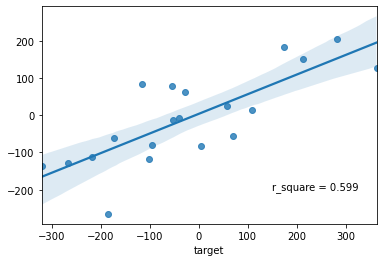

In [16]:
_ = sns.regplot(x=y_test, y=y_pred)
_ = plt.text(x=150, y=-200, s=f"r_square = {round(r2_score(y_test, y_pred), 3)}")

In [17]:
original_r2_score = r2_score(y_test, y_pred)

## Run the same regression as above but with a different noise feature added each time 
(thus seeing how adding a different feature with more or less noise effects the r2 score of the model)

In [18]:
noise_features_list = new_feat_df.drop(edit_feature, axis=1).columns.tolist()

In [19]:
all_r2_df = pd.DataFrame()
for noise_feat in noise_features_list:
    
    X = df.filter(regex="feat")
    X = pd.concat([X, new_feat_df[[noise_feat]]], axis=1)
    y = df["target"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    _ = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    current_r2_df = pd.DataFrame({"added_feature": noise_feat,
                                  "noise_std": float(noise_feat[-3:]),
                                  "r2": r2_score(y_test, y_pred)}, index=[0])
    all_r2_df = pd.concat([all_r2_df, current_r2_df])

## Show an example of one of the X's to compare to the initial data frame used to get the initial r2 score shown above in the scatter plot

In [20]:
df.filter(regex="feat").head(1)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9
0,-0.92693,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044


In [21]:
X.head(1)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,extra_feat_99.9
0,-0.92693,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044,9.020166


## Plot all the r2 scores

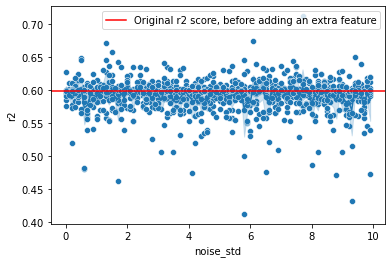

In [22]:
_ = sns.scatterplot(data=all_r2_df, x="noise_std", y="r2")
_ = sns.lineplot(data=all_r2_df, x="noise_std", y="r2")
_ = plt.axhline(y=original_r2_score, c="red", label="Original r2 score, before adding an extra feature")
_ = plt.legend()

## Initial multiple choice question:

Adding a non-important feature to a linear regression model may result in: 
1. Increase in R-square 
2. Decrease in R-square 

Answer: Only 1 is correct

## Based on the r2 vs noise_std plot it seems like the answer hinges on how one defines "non-important to the model".

#### So whilst in theory - based on the formula used to calculate the r2 score - adding an extra feature should always increase the r-squared score - hence the need for adjusted r-squareds, it actually hinges on what is considered "non-important". Hence I would suggest rewording the multiple choice question to reflect this somehow.